In [11]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import scipy as sp
import tensorflow as tf
import tensorflow.keras as keras
import zipfile
import pathlib

import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'
np.set_printoptions(precision=3, suppress=True)

In [13]:
appleDirectory = '../data/Train'
data_dir = pathlib.Path(appleDirectory)
edgeFiles = list()

for filename in os.listdir(appleDirectory):
    imgAppleDirectory = os.path.join(appleDirectory, filename)
    edgeFiles.append(imgAppleDirectory)
    # print(edgeFiles)

In [14]:
edgeFiles = [img for img in edgeFiles if ".jpg" in img]
# print(type(edgeFiles))
# print(edgeFiles[0])

In [15]:
batch_size = 32
img_height = 360
img_width = 360

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 382 files belonging to 4 classes.
Using 306 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 382 files belonging to 4 classes.
Using 76 files for validation.


In [17]:
class_names = train_ds.class_names

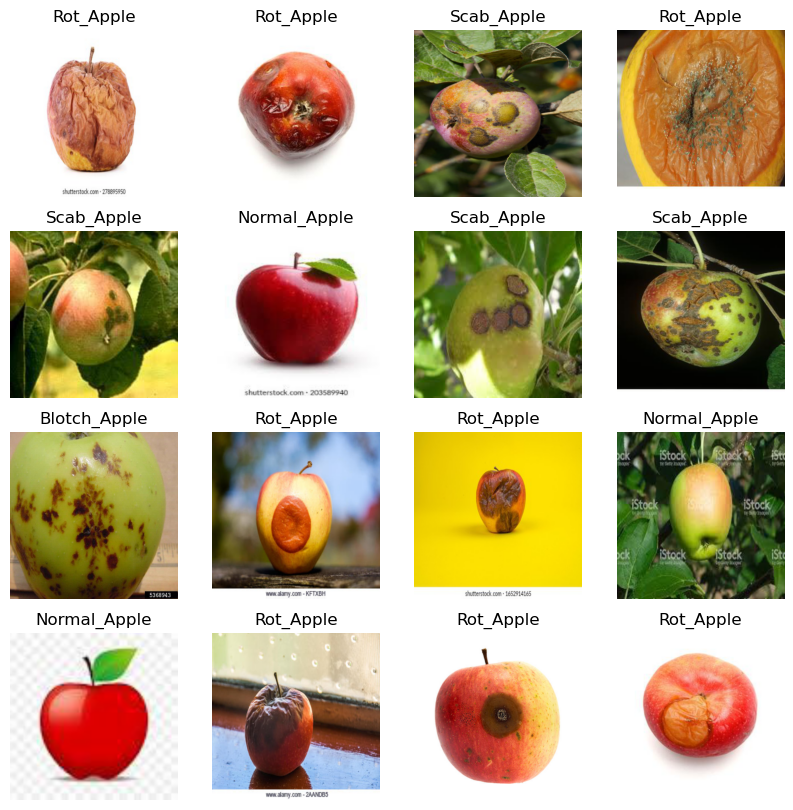

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [92]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2 ),  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [93]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 360, 360, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 360, 360, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 180, 180, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 90, 90, 64)      

In [95]:

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/15
10/10 [==============================] - 16s 1s/step - loss: 6.0856 - accuracy: 0.2908 - val_loss: 1.2921 - val_accuracy: 0.3947
Epoch 2/15
10/10 [==============================] - 15s 1s/step - loss: 1.1366 - accuracy: 0.5261 - val_loss: 1.1270 - val_accuracy: 0.4605
Epoch 3/15
10/10 [==============================] - 16s 2s/step - loss: 0.8597 - accuracy: 0.6503 - val_loss: 0.8643 - val_accuracy: 0.6447
Epoch 4/15
10/10 [==============================] - 17s 2s/step - loss: 0.6231 - accuracy: 0.7614 - val_loss: 0.7033 - val_accuracy: 0.6974
Epoch 5/15
10/10 [==============================] - 16s 2s/step - loss: 0.4748 - accuracy: 0.8203 - val_loss: 0.7022 - val_accuracy: 0.7368
Epoch 6/15
10/10 [==============================] - 16s 1s/step - loss: 0.3322 - accuracy: 0.9216 - val_loss: 0.6688 - val_accuracy: 0.7500
Epoch 7/15
 8/10 [=======================>......] - ETA: 2s - loss: 0.1820 - accuracy: 0.9453

In [49]:
from keras.models import load_model

model.save('saved_models/appleModel_02.h5')

In [ ]:
# model = load_model('saved_models/appleModel_01.h5')

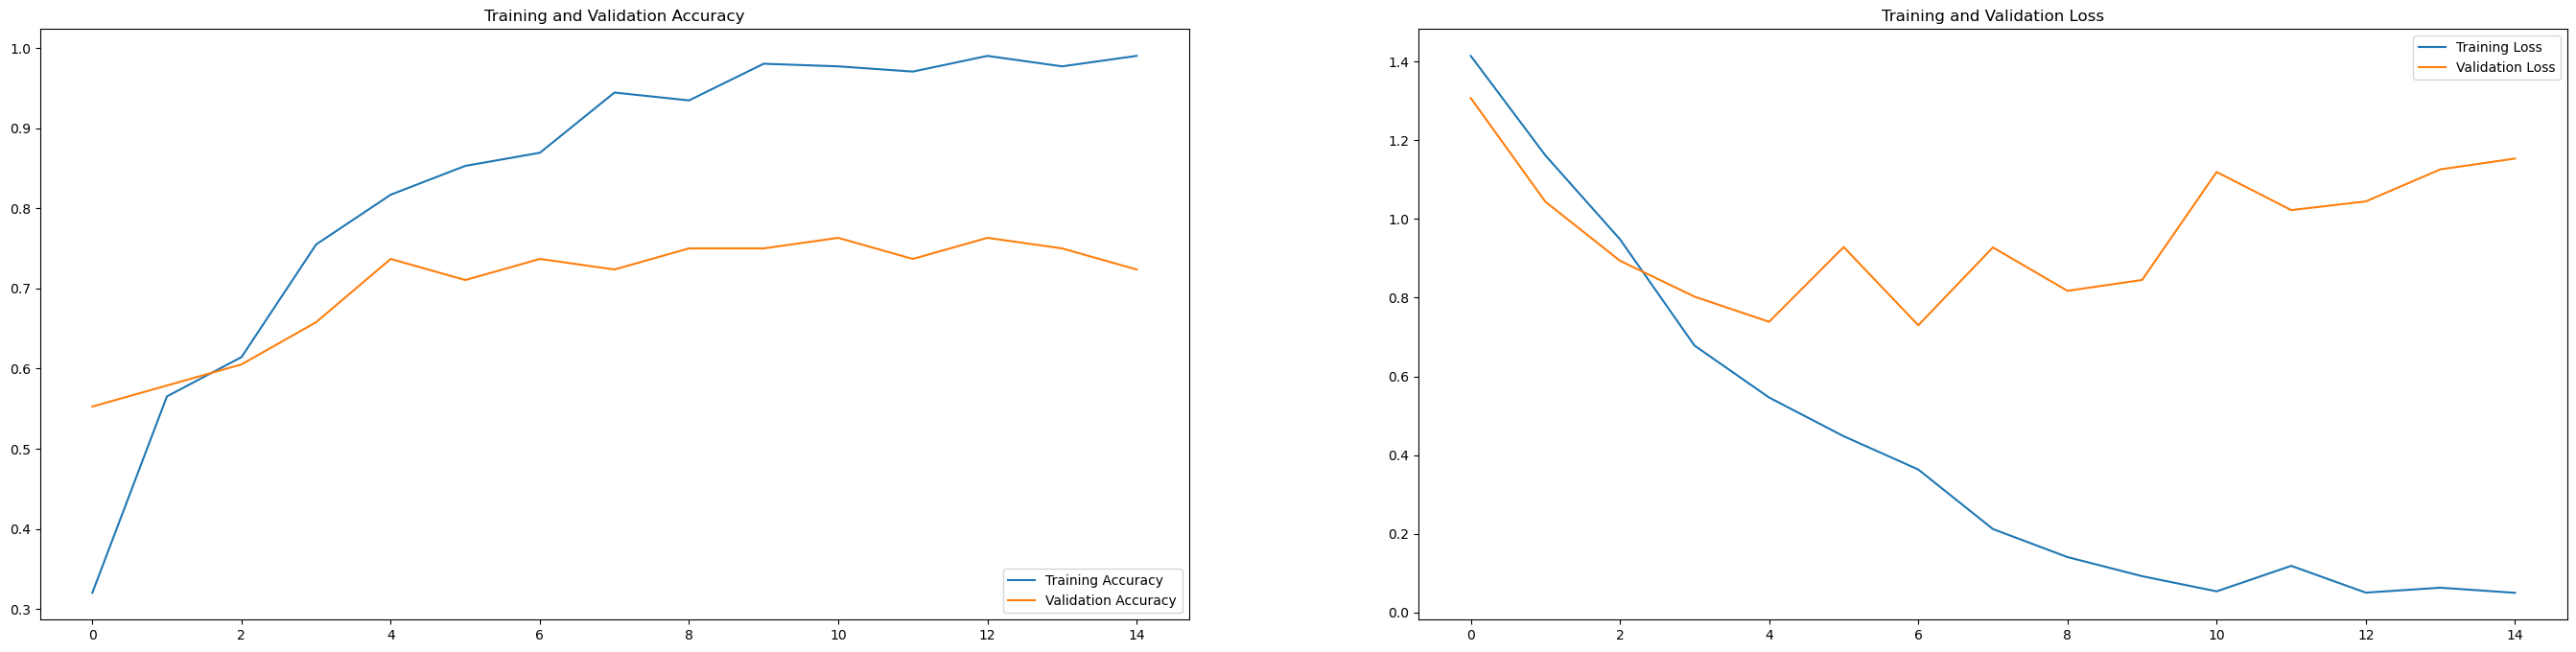

<Figure size 640x480 with 0 Axes>

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [52]:
plt.savefig('saved_models/appleModel_02.png')

<Figure size 640x480 with 0 Axes>